<a href="https://colab.research.google.com/github/ninja-codes-droid/Machine_learning_project/blob/master/Testings/First_CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building CNN - Convolution Neural Network

##Importing Libraries

In [1]:
import numpy as np   #For array of images 
import matplotlib.pyplot as plt # For Data Visualization

import seaborn as sns # used for statistical representation toped on matplotlib and integrated with pandas
#import keras  # Generate an error " No attribute datasets"  while importing dataset
import tensorflow.keras as tk #Keras is a high-level neural network library that runs on top of TensorFlow
#import tensorflow as tf
#from tensorflow import keras # Keras can be imported this way also the tk way too 
#from tensorflow.keras import layers


## Load Dataset

In [3]:
(x_train,y_train),(x_test,y_test)=tk.datasets.fashion_mnist.load_data()  #importing the dataset and stored in different variables

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape # Displaying the shape of data

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
x_train[0]  # This is a single image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

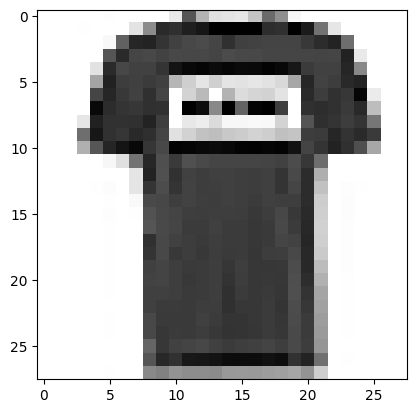

In [8]:
plt.imshow(x_train[1],cmap = "Greys") #Display sample images

In [9]:
y_test[1]

2

##Change dimention

In [10]:
x_train.ndim #CNN only takes 4 dim objects but our image has 3 dimentions

3

In [11]:
x_train=np.expand_dims(x_train, -1) #Making in a 4 dim object , every time it runs add a dimention
x_test=np.expand_dims(x_train, -1) 

In [12]:
x_train.ndim,x_train.shape 

(4, (60000, 28, 28, 1))

## Feature scaling

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

##Split Dataset

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state= 2020)

In [16]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

##Model building

In [17]:
#CNN - Convolutional Neural Network
model = tk.models.Sequential() # this generates  no  error there is no attribute Sequential
#model = keras.models.Sequential() 

In [19]:
model.add(tk.layers.Conv2D(32,(3,3),activation ='relu',input_shape=[28,28,1]))
model.add(tk.layers.MaxPooling2D(2,2))
model.add(tk.layers.Flatten()) # to get it in single vector
## Create Dense layer(Neural Network)
model.add(tk.layers.Dense(units=128,activation='relu'))
model.add(tk.layers.Dense(units=10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [26]:
#compile this model
#model.compile(optimizer = 'adam',loss = 'sparse_categorial_crossentropy',metrics=['accuracy'])  # when we use keras
model.compile(optimizer='adam',
              loss=tk.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train, epochs = 10 , batch_size = 512 , verbose = 1, validation_data =(x_val,y_val))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 [==============================] - 11s 12ms/step - loss: 0.6383 - accuracy: 0.7837 - val_loss: 0.4381 - val_accuracy: 0.8508
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3917 - accuracy: 0.8637 - val_loss: 0.3932 - val_accuracy: 0.8650
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3582 - accuracy: 0.8741 - val_loss: 0.3462 - val_accuracy: 0.8817
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.3205 - accuracy: 0.8870 - val_loss: 0.3296 - val_accuracy: 0.8873
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2967 - accuracy: 0.8963 - val_loss: 0.3147 - val_accuracy: 0.8903
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2817 - accuracy: 0.9019 - val_loss: 0.3101 - val_accuracy: 0.8938
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2693 - accuracy: 0.9056 - val_loss: 0.2979 - val_accuracy: 0.8967
Epoch 8/10
94/94 [===========